Name : Chathumini B.G.D.T.

Index Number : 190107T

Assignment 2

Question 1

In [104]:
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
import random




# np.random.seed(0)
N = 100
half_n = N//2
r = 10
s = r/16
t = np.random.uniform(0 , 2*np.pi , half_n )
n = s*np.random.randn( half_n )
x_c , y_c = ( r + n)*np.cos( t ) , ( r + n)*np.sin( t )
X_circ = np.hstack(( x_c.reshape( half_n , 1 ), y_c.reshape( half_n , 1 ))) # X_circ.shape= (50,2)

m, b = -1, 2
x_l = np.linspace(-12, 12 , half_n )
y_l = m*x_l + b + s*np.random.randn( half_n )
X_line = np.hstack((x_l.reshape( half_n , 1 ) ,y_l.reshape( half_n , 1 )))  # x_line.shape = (50,2)
X = np.vstack((X_circ , X_line ))  # X.shape = (100,2)

In [105]:
class RANSAC:
    # RANSAC algorithm

    def __init__(self,x_values,y_values,thresh_dis,n_samples):
        # initialization of the variables used
        self.x_values=x_values
        self.y_values=y_values
        self.s = 3 #minimum no. of points needed
        self.t = thresh_dis # threshold distance
        self.N=n_samples
        self.outliers = []
        self.inliers = []
        self.points = []
        self.best_model = None

    def dis_point_point(self, p1,p2): # calculate distance from 2 points
        return ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)**0.5

    def random_points(self): # select 3 random points
        self.points=[]
        i =1
        while i < 4:
            r_num =random.randint(0,len(self.x_values)-1)
            point = (self.x_values[r_num],self.y_values[r_num])
            if point not in self.points:
                self.points.append(point)
                i+=1

    
    def circle(self): # calculate the center point and radius of the circle
        p_1,p_2,p_3 = self.points
        Y = np.array([[p_2[0] - p_1[0], p_2[1] - p_1[1]], [p_3[0] - p_2[0], p_3[1] - p_2[1]]])
        Z = np.array([[p_2[0]**2 - p_1[0]**2 + p_2[1]**2 - p_1[1]**2], [p_3[0]**2 - p_2[0]**2 + p_3[1]**2 - p_2[1]**2]])
        inverse_Y = linalg.inv(Y)
        c_x, c_y = np.dot(inverse_Y, Z) / 2
        cx, cy = c_x[0], c_y[0]
        r = np.sqrt((cx - p_1[0])**2 + (cy - p_1[1])**2)
        return cx, cy, r
    
    def in_out_liers(self): # calculate inliers and outlier
        inliers_new =[]
        outliers_new = []
        cen_x, cen_y, r = self.circle()
        for i in range (len(self.x_values)):
            distance = self.dis_point_point((self.x_values[i],self.y_values[i]),(cen_x,cen_y))
            if abs(distance - r)<= self.t:
                inliers_new.append((self.x_values[i],self.y_values[i]))
            else:
                outliers_new.append((self.x_values[i],self.y_values[i]))

        if len(self.inliers)<len(inliers_new): # finding best model
            self.inliers=inliers_new
            self.outliers=outliers_new
            self.best_model=(cen_x, cen_y, r)
    
    
    def find_best_model(self): # find best model by repeating N times
        for j in range(self.N):
            self.random_points()
            self.in_out_liers()
        return self.best_model

In [106]:
# finding the best sample
best_samp=RANSAC(X[:,0],X[:,1],1,35)
print("Best sample",best_samp.find_best_model())

# RANSAC estimation using best sample
ransac=RANSAC(np.array(best_samp.inliers)[:,0],np.array(best_samp.inliers)[:,1],1,35)
print("ransac sample",ransac.find_best_model())

Best sample (0.08767960971178657, 0.549060191622125, 9.85113250010079)
ransac sample (0.046549883187698995, 0.14156133994637296, 9.767300436724396)


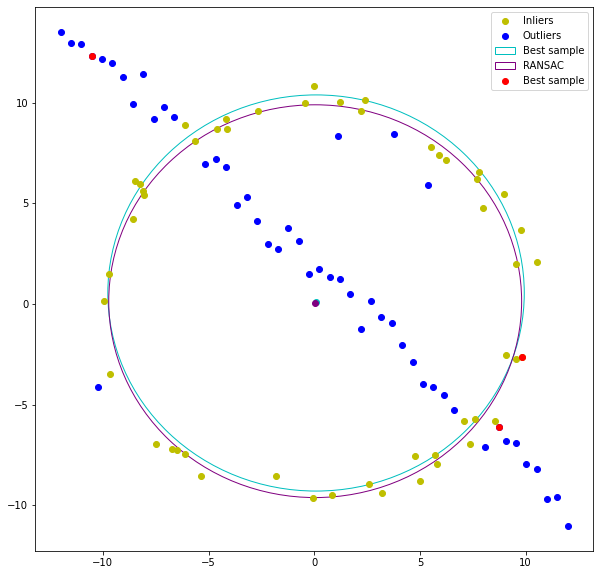

In [122]:

fig,ax=plt.subplots(figsize=(10,10))
ax.plot(np.array(best_samp.inliers)[:,0],np.array(best_samp.inliers)[:,1],'o',color='y', label='Inliers')
ax.plot(np.array(best_samp.outliers)[:,0],np.array(best_samp.outliers)[:,1],'o',color='b', label='Outliers')

best_model_circle = plt.Circle((best_samp.best_model[0], best_samp.best_model[1]), best_samp.best_model[2], color='c',fill=False,label='Best sample')
ax.add_patch(best_model_circle)
ransac_circle = plt.Circle((ransac.best_model[0], ransac.best_model[1]), ransac.best_model[2], color='purple',fill=False,label='RANSAC')
ax.add_patch(ransac_circle)

ax.plot(np.array(best_samp.points)[:,0],np.array(best_samp.points)[:,1],'o',color='r', label='Best sample')
ax.scatter(best_samp.best_model[0],best_samp.best_model[0],c='c')
ax.scatter(ransac.best_model[0],ransac.best_model[0],c='purple')
ax.legend()
plt.show()